In [111]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [112]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [113]:
training_data.shape

(500, 100, 1000)

In [114]:
training_labels.shape

(500, 5050)

In [115]:
#training_labels_padding_zero = np.zeros(training_data.shape)

In [116]:
#training_labels_padding_zero[:training_labels.shape[0], :training_labels.shape[1], :training_labels.shape[2]] = training_labels

In [117]:
#training_labels_padding_zero.shape

In [118]:
#training_labels = training_labels_padding_zero

In [119]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)
print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

(500, 100, 1000)
(500, 5050)
X_train.shape :  (425, 100, 1000)
X_test.shape :  (75, 100, 1000)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [120]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='sigmoid', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1000, activation='relu'))

model.add(Dense(Y_train.shape[1], activation='sigmoid'))

# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))
# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))
# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))
# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))

In [121]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 100, 128)          578048    
_________________________________________________________________
dropout_23 (Dropout)         (None, 100, 128)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              129000    
_________________________________________________________________
dense_16 (Dense)             (None, 5050)              5055050   
Total params: 5,893,682
Trainable params: 5,893,682
Non-trainable params: 0
___________________________________________

In [122]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [123]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=400, verbose=1)


model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/400
425/425 [==============================] - 7s 16ms/step - loss: 0.2524 - accuracy: 0.0000e+00 - val_loss: 0.2048 - val_accuracy: 0.0000e+00
Epoch 2/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2263 - accuracy: 0.0000e+00 - val_loss: 0.1972 - val_accuracy: 0.0000e+00
Epoch 3/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2220 - accuracy: 0.0000e+00 - val_loss: 0.1967 - val_accuracy: 0.0000e+00
Epoch 4/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2209 - accuracy: 0.0024 - val_loss: 0.1967 - val_accuracy: 0.0000e+00
Epoch 5/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2212 - accuracy: 0.0000e+00 - val_loss: 0.1963 - val_accuracy: 0.0000e+00
Epoch 6/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2212 - accuracy: 0.0024 - val_loss: 0.1966 - val_accuracy: 0.0000e+00
Epoch 7/400
425/425 [==============================

425/425 [==============================] - 6s 14ms/step - loss: 0.2202 - accuracy: 0.0000e+00 - val_loss: 0.1959 - val_accuracy: 0.0000e+00
Epoch 55/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2202 - accuracy: 0.0000e+00 - val_loss: 0.1959 - val_accuracy: 0.0000e+00
Epoch 56/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2204 - accuracy: 0.0000e+00 - val_loss: 0.1961 - val_accuracy: 0.0000e+00
Epoch 57/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2203 - accuracy: 0.0000e+00 - val_loss: 0.1964 - val_accuracy: 0.0000e+00
Epoch 58/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2201 - accuracy: 0.0000e+00 - val_loss: 0.1964 - val_accuracy: 0.0000e+00
Epoch 59/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2201 - accuracy: 0.0000e+00 - val_loss: 0.1959 - val_accuracy: 0.0000e+00
Epoch 60/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2203 - accuracy:

425/425 [==============================] - 6s 14ms/step - loss: 0.2198 - accuracy: 0.0000e+00 - val_loss: 0.1954 - val_accuracy: 0.0000e+00
Epoch 108/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2195 - accuracy: 0.0000e+00 - val_loss: 0.1955 - val_accuracy: 0.0000e+00
Epoch 109/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2193 - accuracy: 0.0000e+00 - val_loss: 0.1952 - val_accuracy: 0.0000e+00
Epoch 110/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2192 - accuracy: 0.0000e+00 - val_loss: 0.1947 - val_accuracy: 0.0000e+00
Epoch 111/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2189 - accuracy: 0.0000e+00 - val_loss: 0.1949 - val_accuracy: 0.0000e+00
Epoch 112/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2179 - accuracy: 0.0000e+00 - val_loss: 0.1918 - val_accuracy: 0.0000e+00
Epoch 113/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2152 - acc

425/425 [==============================] - 6s 14ms/step - loss: 0.1998 - accuracy: 0.0024 - val_loss: 0.1855 - val_accuracy: 0.0000e+00
Epoch 162/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2007 - accuracy: 0.0000e+00 - val_loss: 0.1857 - val_accuracy: 0.0000e+00
Epoch 163/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2008 - accuracy: 0.0071 - val_loss: 0.1859 - val_accuracy: 0.0000e+00
Epoch 164/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2000 - accuracy: 0.0047 - val_loss: 0.1872 - val_accuracy: 0.0000e+00
Epoch 165/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1993 - accuracy: 0.0071 - val_loss: 0.1883 - val_accuracy: 0.0000e+00
Epoch 166/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2002 - accuracy: 0.0024 - val_loss: 0.1857 - val_accuracy: 0.0000e+00
Epoch 167/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1994 - accuracy: 0.0024 - val_

Epoch 216/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1954 - accuracy: 0.0071 - val_loss: 0.1910 - val_accuracy: 0.0000e+00
Epoch 217/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1953 - accuracy: 0.0071 - val_loss: 0.1916 - val_accuracy: 0.0000e+00
Epoch 218/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1955 - accuracy: 0.0071 - val_loss: 0.1936 - val_accuracy: 0.0000e+00
Epoch 219/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1950 - accuracy: 0.0094 - val_loss: 0.1940 - val_accuracy: 0.0000e+00
Epoch 220/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1964 - accuracy: 0.0071 - val_loss: 0.1907 - val_accuracy: 0.0000e+00
Epoch 221/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1977 - accuracy: 0.0071 - val_loss: 0.1899 - val_accuracy: 0.0000e+00
Epoch 222/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1961 - accuracy: 0.0

425/425 [==============================] - 6s 14ms/step - loss: 0.1912 - accuracy: 0.0024 - val_loss: 0.1956 - val_accuracy: 0.0000e+00
Epoch 271/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1920 - accuracy: 0.0024 - val_loss: 0.1996 - val_accuracy: 0.0000e+00
Epoch 272/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1917 - accuracy: 0.0071 - val_loss: 0.1989 - val_accuracy: 0.0000e+00
Epoch 273/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1911 - accuracy: 0.0024 - val_loss: 0.1961 - val_accuracy: 0.0000e+00
Epoch 274/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1908 - accuracy: 0.0024 - val_loss: 0.1940 - val_accuracy: 0.0000e+00
Epoch 275/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1912 - accuracy: 0.0071 - val_loss: 0.1966 - val_accuracy: 0.0000e+00
Epoch 276/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1903 - accuracy: 0.0071 - val_loss

Epoch 325/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1868 - accuracy: 0.0047 - val_loss: 0.1981 - val_accuracy: 0.0000e+00
Epoch 326/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1894 - accuracy: 0.0024 - val_loss: 0.1927 - val_accuracy: 0.0000e+00
Epoch 327/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1881 - accuracy: 0.0024 - val_loss: 0.1923 - val_accuracy: 0.0000e+00
Epoch 328/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1862 - accuracy: 0.0024 - val_loss: 0.1926 - val_accuracy: 0.0000e+00
Epoch 329/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1856 - accuracy: 0.0024 - val_loss: 0.1954 - val_accuracy: 0.0000e+00
Epoch 330/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1854 - accuracy: 0.0024 - val_loss: 0.1963 - val_accuracy: 0.0000e+00
Epoch 331/400
425/425 [==============================] - 6s 15ms/step - loss: 0.1848 - accuracy: 0.0

425/425 [==============================] - 6s 14ms/step - loss: 0.1849 - accuracy: 0.0024 - val_loss: 0.1955 - val_accuracy: 0.0000e+00
Epoch 380/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1821 - accuracy: 0.0024 - val_loss: 0.1947 - val_accuracy: 0.0000e+00
Epoch 381/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1817 - accuracy: 0.0024 - val_loss: 0.1960 - val_accuracy: 0.0000e+00
Epoch 382/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1808 - accuracy: 0.0024 - val_loss: 0.1961 - val_accuracy: 0.0000e+00
Epoch 383/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1807 - accuracy: 0.0024 - val_loss: 0.1976 - val_accuracy: 0.0000e+00
Epoch 384/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1813 - accuracy: 0.0071 - val_loss: 0.1967 - val_accuracy: 0.0000e+00
Epoch 385/400
425/425 [==============================] - 6s 14ms/step - loss: 0.1815 - accuracy: 0.0024 - val_loss

In [125]:
training_result = model.evaluate(X_train, Y_train)
testing_result = model.evaluate(X_test, Y_test)

75/75 [==============================] - 0s 3ms/step


In [126]:
print('Training Acc: ', training_result[1])
print('Testing Acc: ', testing_result[1])

Training Acc:  0.002352941082790494
Testing Acc:  0.0


In [127]:
results = model.predict(X_test)

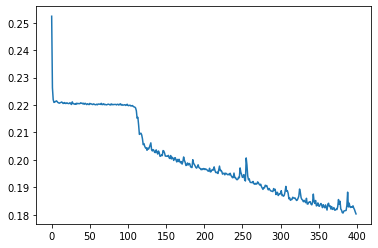

In [128]:
plt.plot(history.history['loss'])
plt.show()